# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import timestamp 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
date = []
country = []
city_name = []
cloudiness = []
max_temp = []
humidity = []
wind_speed = []
lat = []
lng = []

#Loop to make api calls w/ city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        wind_speed.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping...")

Processing record 1|mount gambier
City not found. skipping...
Processing record 2|tambura
Processing record 3|albany
Processing record 4|rikitea
Processing record 5|zhigansk
Processing record 6|marystown
Processing record 7|kapaa
Processing record 8|upernavik
City not found. skipping...
Processing record 9|busselton
City not found. skipping...
Processing record 10|georgetown
Processing record 11|tasiilaq
Processing record 12|ostrovnoy
Processing record 13|graham
Processing record 14|hilo
Processing record 15|torbay
Processing record 16|punta arenas
Processing record 17|amapa
Processing record 18|lata
Processing record 19|east london
Processing record 20|vagur
Processing record 21|perpignan
Processing record 22|llanes
Processing record 23|mar del plata
Processing record 24|moron
Processing record 25|ushuaia
Processing record 26|maraba
Processing record 27|elizabeth city
Processing record 28|kahului
Processing record 29|guerrero negro
Processing record 30|bredasdorp
Processing record 31|

Processing record 241|linxia
Processing record 242|tezu
Processing record 243|verkhoyansk
Processing record 244|buala
Processing record 245|bethanien
Processing record 246|erzin
Processing record 247|mizque
Processing record 248|great yarmouth
Processing record 249|umm kaddadah
Processing record 250|koumac
Processing record 251|santander jimenez
Processing record 252|kadoma
Processing record 253|saint-philippe
Processing record 254|liwale
Processing record 255|serowe
Processing record 256|hervey bay
City not found. skipping...
Processing record 257|matamoros
Processing record 258|juan lacaze
Processing record 259|ribeira grande
Processing record 260|teguise
Processing record 261|marawi
Processing record 262|southbridge
Processing record 263|lenoir city
Processing record 264|itarema
Processing record 265|fort-shevchenko
Processing record 266|salinopolis
Processing record 267|kingman
Processing record 268|balikpapan
Processing record 269|lakselv
Processing record 270|tura
Processing reco

Processing record 491|esperance
Processing record 492|leningradskiy
Processing record 493|naguabo
Processing record 494|ambilobe
Processing record 495|sukhumi
Processing record 496|ayna
Processing record 497|paita
Processing record 498|praia da vitoria
Processing record 499|jieshi
Processing record 500|cumaral
Processing record 501|macia
Processing record 502|east patchogue
Processing record 503|ladario
Processing record 504|rairangpur
Processing record 505|thinadhoo
Processing record 506|hegang
Processing record 507|baltay
Processing record 508|guia de isora
Processing record 509|rumoi
Processing record 510|challakere
Processing record 511|phan thiet
Processing record 512|ballina
Processing record 513|mbini
Processing record 514|mehamn
Processing record 515|sao felix do xingu
Processing record 516|vangaindrano
Processing record 517|portales
Processing record 518|galesong
Processing record 519|yelniki
Processing record 520|khandyga
Processing record 521|antofagasta
Processing record 52

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
#Creat city dataframe
city_df = pd.DataFrame({"Date":date, 
                        "Country":country, 
                        "City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed,
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng
                                         })
city_df = city_df.rename_axis('City ID')

city_df["Date"] = pd.to_datetime(city_df['Date'], unit ='s').dt.date

#Export to csv
city_df.to_csv("output_data/city_data.csv")

#Display dataframe
city_df.head()

,Date,Country,City,Cloudiness,Max Temp,Wind Speed,Humidity,Lat,Lng
City ID,,,,,,,,,
0,2021-04-16,AU,Mount Gambier,90,51.80,5.75,76,-37.8333,140.7667
1,2021-04-16,SS,Tambura,60,84.29,1.39,28,5.6000,27.4667
2,2021-04-16,US,Albany,100,43.00,1.01,77,42.6001,-73.9662
3,2021-04-16,PF,Rikitea,100,77.22,12.64,71,-23.1203,-134.9692
4,2021-04-16,RU,Zhigansk,100,28.83,29.48,96,66.7697,123.3711


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
humidity_check = city_df["Humidity"].max()
humidity_check

100

In [32]:
#  Get the indices of cities that have humidity over 100%.


In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

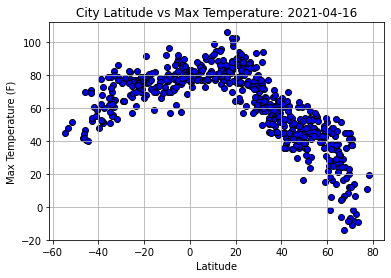

In [87]:
date_st = city_df['Date'][0]


plt.scatter(city_df["Lat"], city_df["Max Temp"], facecolor = "blue", edgecolor = "black")
plt.title(f'City Latitude vs Max Temperature: {date_st}')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('output_data/lat_temp_plot')
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

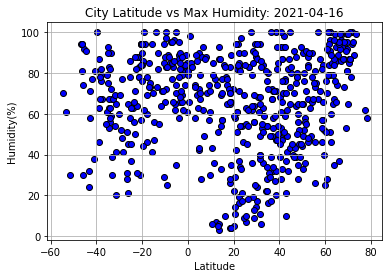

In [85]:

plt.scatter(city_df["Lat"], city_df["Humidity"], facecolor = "blue", edgecolor = "black")
plt.title(f'City Latitude vs Max Humidity: {date_st}')
plt.ylabel("Humidity(%)")
plt.xlabel('Latitude')
plt.grid()
plt.savefig('output_data/lat_humidity_plot')
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

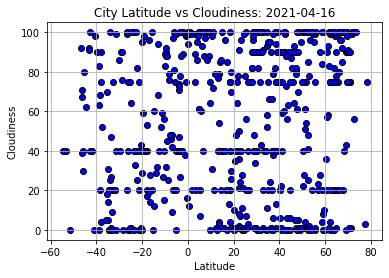

In [86]:


plt.scatter(city_df["Lat"], city_df["Cloudiness"], facecolor = "blue", edgecolor = "black")
plt.title(f'City Latitude vs Cloudiness: {date_st}')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('output_data/lat_cloudy_plot')
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

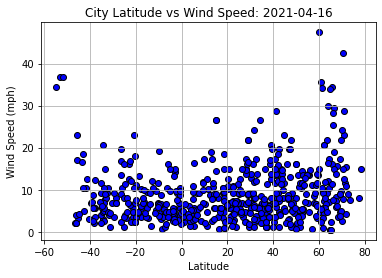

In [107]:


plt.scatter(city_df["Lat"], city_df["Wind Speed"], facecolor = "blue", edgecolor = "black")
plt.title(f'City Latitude vs Wind Speed: {date_st}')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('output_data/lat_wind_plot')
plt.show

In [132]:
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

In [133]:
def linear_reg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.872107584163795


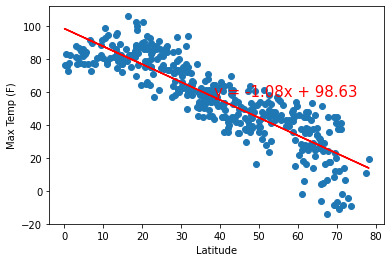

None


In [134]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6844127194233196


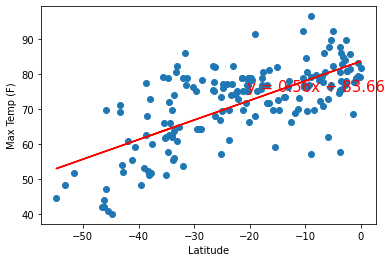

None


In [135]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2748644120000967


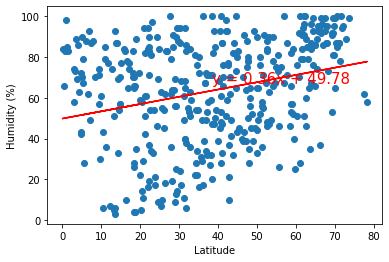

None


In [136]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24666622914274514


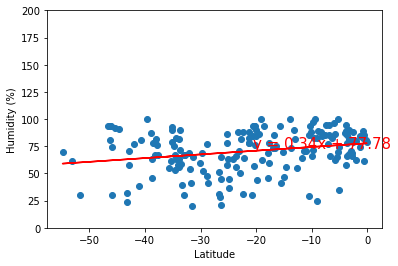

None


In [137]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08156820861185198


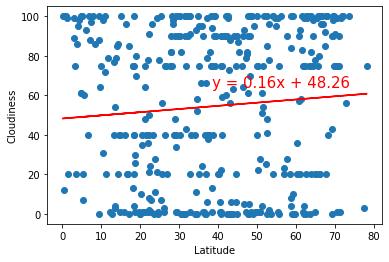

None


In [138]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22468550078492952


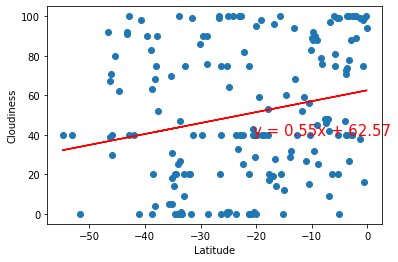

None


In [139]:

x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.25682431488985824


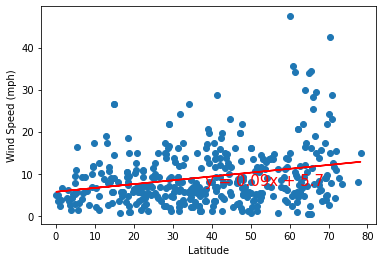

None


In [140]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
print(linear_reg(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.27287197902940796


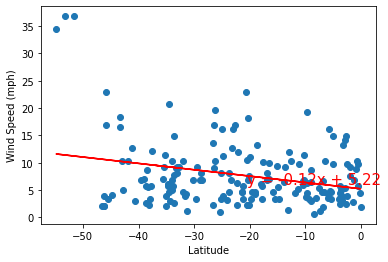

None


In [142]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
print(linear_reg(x_values,y_values))